(-0.5, 199.5, 199.5, -0.5)

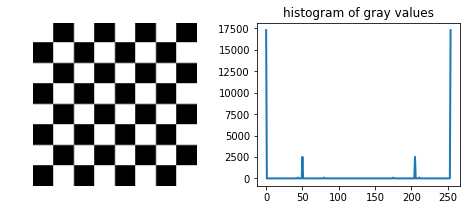

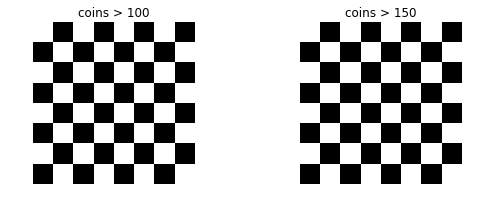

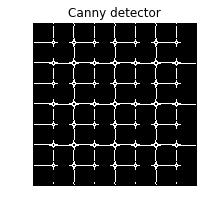

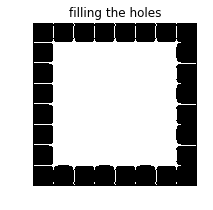

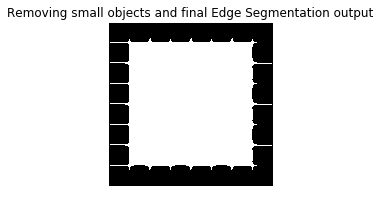

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data


#coins = mpimg.imread(r'C:\Users\Geronimo\Desktop\coins_image.jpg', flatten = True)
coins = data.checkerboard()
hist = np.histogram(coins, bins=np.arange(0, 256))

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')

#Plotting histogram

axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histogram of gray values')

#A simple way to segment the coins is to choose a threshold based on the histogram of gray values.

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(coins > 100, cmap=plt.cm.gray, interpolation='nearest')
axes[0].set_title('coins > 100')

axes[1].imshow(coins > 150, cmap=plt.cm.gray, interpolation='nearest')
axes[1].set_title('coins > 150')

for a in axes:
    a.axis('off')

plt.tight_layout()

#Unfortunately, thresholding this image gives a binary image that either misses significant parts of the coins 
#or merges parts of the background with the coins.

#we try to delineate the contours of the coins using edge-based segmentation.
#To do this, we first get the edges of features using the Canny edge-detector.

from skimage.feature import canny

edges = canny(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')

#These contours are then filled using mathematical morphology.

from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('filling the holes')
ax.axis('off')

#setting a minimum size for valid objects(Small spurious objects are removed)

from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Removing small objects and final Edge Segmentation output')
ax.axis('off')

#this method is not very robust, since contours that are not perfectly closed are not filled correctly, 
#as is the case for one unfilled coin. That is why we will try using the Region based Segmentation in the next program.